In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import pickle

from freeman.task.trading.config import *
from freeman.utils.support_tf import LogLevelManager as llm
llm.set(2)

In [2]:
train_df = pd.read_csv("/home/freeman/projects/data/trading/data/train_5930.csv", sep=",")
test_df = pd.read_csv("/home/freeman/projects/data/trading/data/test_5930.csv", sep=",")
with open(f"/home/freeman/projects/data/trading/temp/max_value.pkl", "rb") as f:
    max_value = pickle.load(f)

In [9]:
train_df_x, train_df_y = train_df.iloc[:, 1:-1].copy(deep=True), train_df.iloc[:, -1:]
test_df_x, test_df_y = test_df.iloc[:, 1:-1].copy(deep=True), test_df.iloc[:, -1:]

In [17]:
train_x = tf.constant(train_df_x.to_numpy(), dtype=tf.float32)
train_y = tf.constant(train_df_y.to_numpy(), dtype=tf.float32)
test_x = tf.constant(test_df_x.to_numpy(), dtype=tf.float32)
test_y = tf.constant(test_df_y.to_numpy(), dtype=tf.float32)

In [18]:
#train_x = tf.expand_dims(train_x, axis=2)

In [19]:
#train_x = tf.expand_dims(train_x, axis=-1)

In [20]:
#train_x.shape

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu", input_shape=train_x.shape[1:]),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer="adam",
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [57]:
model.fit(train_x, train_y, epochs=1000, batch_size=128)

Epoch 1/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.5821 - mean_absolute_error: 0.7417
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2077 - mean_absolute_error: 0.4295
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.1343
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.1154
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.1178
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0593
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0566
Epoch 8/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0531
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0456
Epoch 10/1000
8/8 [

In [58]:
pred_y = model.predict(test_x)

In [59]:
for p, r in zip(pred_y, test_y):
    print(f"예측: {int(p[0]*max_value['high'])}, 실제: {int(r[0]*max_value['high'])}")

예측: 59509, 실제: 58700
예측: 59043, 실제: 58500
예측: 58499, 실제: 57600
예측: 57847, 실제: 57400
예측: 57467, 실제: 58399
예측: 59017, 실제: 58800
예측: 59947, 실제: 59400
예측: 59411, 실제: 58000
예측: 57841, 실제: 57000
예측: 57006, 실제: 56200
예측: 56467, 실제: 57100
예측: 57874, 실제: 57199
예측: 57526, 실제: 56400
예측: 56469, 실제: 58200
예측: 58852, 실제: 58700
예측: 59285, 실제: 58800
예측: 59916, 실제: 58100
예측: 58000, 실제: 58000
예측: 58221, 실제: 57500
예측: 57750, 실제: 60000
예측: 59678, 실제: 61900
예측: 62580, 실제: 60899
예측: 60567, 실제: 60500
예측: 61058, 실제: 61800
예측: 62175, 실제: 61300
예측: 61748, 실제: 61100
예측: 62187, 실제: 61700
예측: 61683, 실제: 61800
예측: 61762, 실제: 61900
예측: 62291, 실제: 61400
예측: 61915, 실제: 61300
예측: 62019, 실제: 61700
예측: 61703, 실제: 61300
예측: 61242, 실제: 61499
예측: 61745, 실제: 61499
예측: 61859, 실제: 60800
예측: 61611, 실제: 60000
예측: 59822, 실제: 59100
예측: 58784, 실제: 59900
예측: 60217, 실제: 60199
예측: 60641, 실제: 61000
예측: 61294, 실제: 60400
예측: 60526, 실제: 61499
예측: 61905, 실제: 60899
예측: 61200, 실제: 60000
예측: 60547, 실제: 59100
예측: 58919, 실제: 58999
예측: 59180, 실제

In [60]:
type((pred_y * max_value["high"])[0])

numpy.ndarray

In [61]:
pred_yy = pred_y * max_value["high"]
pred_yy = np.squeeze(pred_yy, axis=1)
pred_yy

array([59509.707, 59043.5  , 58499.12 , 57847.824, 57467.32 , 59017.457,
       59947.92 , 59411.68 , 57841.82 , 57006.117, 56467.11 , 57874.207,
       57526.97 , 56469.35 , 58852.938, 59285.83 , 59916.402, 58000.81 ,
       58221.08 , 57750.85 , 59678.83 , 62580.863, 60567.395, 61058.926,
       62175.098, 61748.38 , 62187.703, 61683.984, 61762.74 , 62291.266,
       61915.395, 62019.71 , 61703.227, 61242.992, 61745.84 , 61859.164,
       61611.895, 59822.047, 58784.855, 60217.68 , 60641.81 , 61294.574,
       60526.32 , 61905.523, 61200.562, 60547.14 , 58919.688, 59180.52 ,
       59920.098, 60710.086, 58860.81 , 58723.934, 59843.11 , 58270.344,
       57853.016, 57885.24 , 57153.02 , 55847.707, 55879.76 , 58662.023,
       56382.51 , 56285.973, 56209.758, 57385.562, 55986.258, 55130.43 ,
       54285.527, 54545.67 , 54261.918, 54010.992, 52755.43 , 53026.81 ,
       53158.75 , 55638.22 , 56597.08 , 56943.25 , 56498.855, 54830.48 ,
       56323.66 ], dtype=float32)

In [62]:
test_yy = np.squeeze(test_y*max_value['high'], axis=1)
test_yy

array([58700.   , 58500.   , 57600.   , 57400.   , 58399.996, 58800.   ,
       59400.   , 58000.   , 57000.   , 56200.   , 57100.004, 57199.996,
       56400.   , 58200.   , 58700.   , 58800.   , 58100.   , 58000.   ,
       57500.   , 60000.   , 61900.   , 60899.996, 60500.   , 61800.   ,
       61300.   , 61100.   , 61700.   , 61800.   , 61900.   , 61400.004,
       61300.   , 61700.   , 61300.   , 61499.996, 61499.996, 60800.004,
       60000.   , 59100.   , 59900.   , 60199.996, 61000.   , 60400.   ,
       61499.996, 60899.996, 60000.   , 59100.   , 58999.996, 59700.   ,
       60000.   , 58600.   , 58800.   , 59700.   , 58399.996, 57500.   ,
       57100.004, 57100.004, 55999.996, 55600.   , 58100.   , 56800.   ,
       55999.996, 56200.   , 56400.   , 55800.   , 55300.004, 54400.   ,
       54500.   , 53900.   , 54199.996, 52900.004, 52600.   , 53100.   ,
       55200.   , 55999.996, 56300.   , 56200.   , 55399.996, 55800.   ,
           0.   ], dtype=float32)

In [63]:
pred_df = pd.DataFrame()
pred_df['real'] = test_yy

In [64]:
pred_df["pred"] = pred_yy

In [65]:
pred_df

,real,pred
0,58700.000000,59509.707031
1,58500.000000,59043.500000
2,57600.000000,58499.121094
3,57400.000000,57847.824219
4,58399.996094,57467.320312
...,...,...
74,56300.000000,56597.078125
75,56200.000000,56943.250000
76,55399.996094,56498.855469
77,55800.000000,54830.480469


<AxesSubplot:>

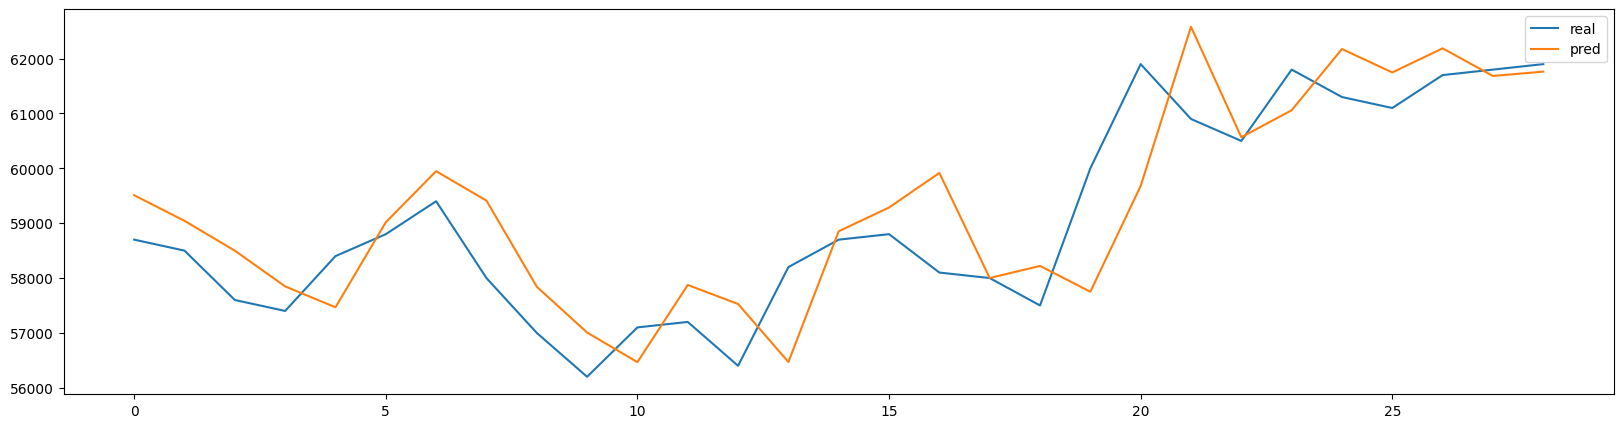

In [66]:
pred_df.iloc[:-50, :].plot(figsize=(20,5))